<a href="https://colab.research.google.com/github/Masoud0389/Steady_State/blob/main/mlp_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
#pip install git+https://github.com/Kaggle/learntools.git

In [179]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
import numpy as np
warnings.filterwarnings('ignore')
data = pd.read_csv('DATASET1.csv')
#data.info()

In [181]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,load,weakdays,season,label
0,1,0.99833,0.99057,0.98682,0.98319,0.97557,0.97521,0.97276,0.97097,0.96949,...,0.96900,0.96591,0.96443,0.96483,0.96541,0.96693,0.67977,1,1,0
1,1,0.99834,0.99066,0.98695,0.98336,0.97583,0.97549,0.97307,0.97131,0.96986,...,0.96935,0.96630,0.96484,0.96527,0.96584,0.96737,0.67443,1,1,0
2,1,0.99834,0.99066,0.98695,0.98335,0.97582,0.97548,0.97306,0.97130,0.96985,...,0.96933,0.96629,0.96483,0.96525,0.96583,0.96736,0.67463,1,1,0
3,1,0.99832,0.99056,0.98681,0.98317,0.97554,0.97518,0.97272,0.97093,0.96944,...,0.96896,0.96586,0.96438,0.96478,0.96536,0.96688,0.68036,1,1,0
4,1,0.99829,0.99037,0.98653,0.98281,0.97497,0.97457,0.97207,0.97020,0.96865,...,0.96822,0.96503,0.96351,0.96387,0.96443,0.96596,0.69162,1,1,0


In [182]:
#data.isna().sum()

In [183]:
#data.season.value_counts()/96

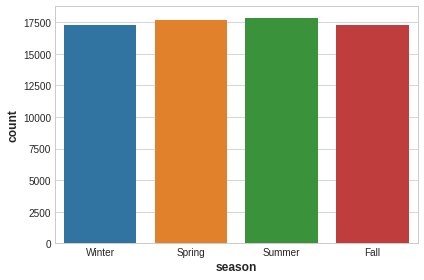

In [184]:
g = sns.countplot(data['season'])
g.set_xticklabels(['Winter','Spring', 'Summer', 'Fall'])
plt.show()

In [185]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = StandardScaler().fit_transform(X)
X = normalize(X, norm="max")

In [186]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.7)
input_shape = [X_train.shape[1]]

In [187]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(50, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [188]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [189]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [190]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
96/96 [==============================] - 2s 10ms/step - loss: 0.5110 - binary_accuracy: 0.7087 - val_loss: 0.5203 - val_binary_accuracy: 0.7288
Epoch 2/200
96/96 [==============================] - 1s 8ms/step - loss: 0.4440 - binary_accuracy: 0.7239 - val_loss: 0.4573 - val_binary_accuracy: 0.7283
Epoch 3/200
96/96 [==============================] - 1s 8ms/step - loss: 0.4258 - binary_accuracy: 0.7282 - val_loss: 0.4248 - val_binary_accuracy: 0.7298
Epoch 4/200
96/96 [==============================] - 1s 8ms/step - loss: 0.4159 - binary_accuracy: 0.7282 - val_loss: 0.4123 - val_binary_accuracy: 0.7270
Epoch 5/200
96/96 [==============================] - 1s 8ms/step - loss: 0.4120 - binary_accuracy: 0.7279 - val_loss: 0.4070 - val_binary_accuracy: 0.7275
Epoch 6/200
96/96 [==============================] - 1s 8ms/step - loss: 0.4107 - binary_accuracy: 0.7263 - val_loss: 0.3995 - val_binary_accuracy: 0.7269
Epoch 7/200
96/96 [==============================] - 1s 8ms/step - lo

657/657 [==============================] - 1s 985us/step


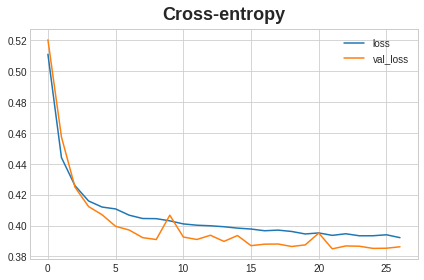

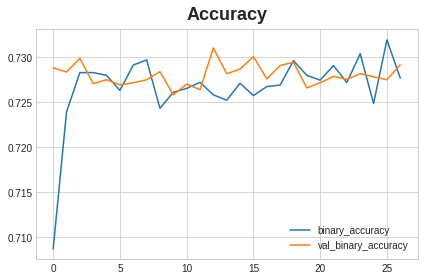

In [191]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
y_pred = model.predict(X_valid).round()

In [192]:
#pip install tensorflow-addons

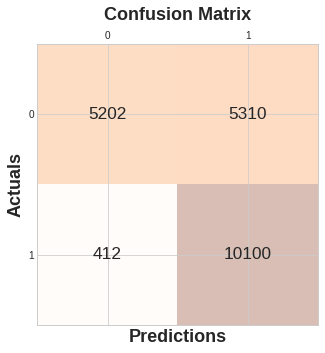

In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [194]:
print(f"f1_score is:{f1_score(y_valid, y_pred, average='binary')}\n accuracy_score is: {accuracy_score(y_valid, y_pred)}\n precision is: {precision_score(y_valid, y_pred)}\n recal is: {recall_score(y_valid, y_pred)}") 

f1_score is:0.7792608595015815
 accuracy_score is: 0.7278348554033486
 precision is: 0.6554185593770279
 recal is: 0.960806697108067
